In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [3]:
##reading the .csv files and building a dataframe to house them

#Build the dataframe for train data
train=pd.read_csv('data/train.csv',encoding='utf-8')
train.drop(['Id'], axis=1)
train_numerical = train.select_dtypes(exclude=['object'])
train_numerical.fillna(0,inplace = True)
train_categoric = train.select_dtypes(include=['object'])
train_categoric.fillna('NONE',inplace = True)
train = train_numerical.merge(train_categoric, left_index = True, right_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [4]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Detchd,Unf,TA,TA,Y,NONE,NONE,NONE,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal


In [5]:
#these next commands to isolate outlier variables. 
#Sklearn will help us remove the outliers in the data. 
#This will make the learning process easier for those data points that more accurately represent non-outlier cases.

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train_numerical)
y_noano = clf.predict(train_numerical)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values
train_numerical = train_numerical.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_numerical.reset_index(drop = True, inplace = True)
train_categoric = train_categoric.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_categoric.reset_index(drop = True, inplace = True)
train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [7]:
print(len(train))

1314


In [10]:
#This next bit of code takes the dataframe, 
#converts it into a matrix and applies what is known as a MinMaxScaler. 
#This process scales the values down to a specified range to make training easier. 
#For example, a list of numbers from 100 to 1000 could be converted to a range of 0 and 1 with 0 being 100 and 1 being 1000.

col_train_num = list(train_numerical.columns)
col_train_num_bis = list(train_numerical.columns)
col_train_cat = list(train_categoric.columns)
col_train_num_bis.remove('SalePrice')
mat_train = np.matrix(train_numerical)
mat_new = np.matrix(train_numerical.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice)
prepro_y = MinMaxScaler()
prepro_y.fit(mat_y.reshape(1314,1))
prepro = MinMaxScaler()
prepro.fit(mat_train)
prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)
train_num_scale = pd.DataFrame(prepro.transform(mat_train),columns = col_train_num)
train[col_train_num] = pd.DataFrame(prepro.transform(mat_train),columns = col_train_num)

train_num_scale.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.375532,...,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.421436
1,0.000685,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.520213,...,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.355734
2,0.001371,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.258511,...,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.457936
3,0.002056,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.114894,...,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.254749
4,0.002742,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.348404,...,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.522421


In [11]:
#The following code will hash the categorical features into to numerical inputs that our model can understand.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
COLUMNS = col_train_num
FEATURES = col_train_num_bis
LABEL = "SalePrice"
FEATURES_CAT = col_train_cat
engineered_features = []
for continuous_feature in FEATURES:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))
for categorical_feature in FEATURES_CAT:
    sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
        categorical_feature, hash_bucket_size=1000)
engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16,combiner="sum"))




In [12]:
#Now we will isolate the input and output variables and then split them into a test and training set. 
#A rule of thumb to use when creating the test train is 80% test and 20% train, 
#which I have done below (test_size=0.2). The result here are input and output sets for both the test and train

# Build the training set and the prediction set
training_set = train[FEATURES + FEATURES_CAT]
prediction_set = train.SalePrice
# Split the train and prediction sets into test train sets
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES + FEATURES_CAT] ,
                                                    prediction_set, test_size=0.2, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES + FEATURES_CAT).merge(y_train, left_index = True, right_index = True)
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES + FEATURES_CAT).merge(y_test, left_index = True, right_index = True)


In [13]:
#Now we can combine the continuous and categorical features back together 
# and then construct the model framework by calling the DNNRegressor functions and 
#passing in the features, hidden layers, and desired activation function. 
#Here were are using three layers, each with a decreasing number of nodes. 
#The activation function is “relu” but try using “leaky relu” or “tanh” to see if you get better results!

training_set[FEATURES_CAT] = training_set[FEATURES_CAT].applymap(str)
testing_set[FEATURES_CAT] = testing_set[FEATURES_CAT].applymap(str)
def input_fn_new(data_set, training = True):
    continuous_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
    
    categorical_cols = {k: tf.SparseTensor(
        indices=[[i, 0] for i in range(data_set[k].size)], values = data_set[k].values, dense_shape = [data_set[k].size, 1]) for k in FEATURES_CAT}
# Combines the dictionaries of the categorical and continuous features
    feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training == True:
        # Converts the label column into a constant Tensor.
        label = tf.constant(data_set[LABEL].values)
# Outputs the feature columns and labels
        return feature_cols, label
    
    return feature_cols
# Builds the Model Framework
regressor = tf.contrib.learn.DNNRegressor(feature_columns = engineered_features, 
                                          activation_fn = tf.nn.relu, hidden_units=[250, 100, 50])
categorical_cols = {k: tf.SparseTensor(indices=[[i, 0] for i in range(training_set[k].size)], values = training_set[k].values, dense_shape = [training_set[k].size, 1]) for k in FEATURES_CAT}


Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026F3C813B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, 

In [14]:
#begin the training progress! It will take a few minutes
regressor.fit(input_fn = lambda: input_fn_new(training_set) , steps=10000)


Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sghosh\AppData\Local\Temp\tmpp3dit8dh\model.ckpt.


INFO:tensorflow:loss = 0.05244443, step = 1
INFO:tensorflow:global_step/sec: 67.5901
INFO:tensorflow:loss = 0.0033665544, step = 101 (1.484 sec)
INFO:tensorflow:global_step/sec: 84.5197
INFO:tensorflow:loss = 0.0028515884, step = 201 (1.183 sec)
INFO:tensorflow:global_step/sec: 109.058
INFO:tensorflow:loss = 0.0025999455, step = 301 (0.916 sec)
INFO:tensorflow:global_step/sec: 106.326
INFO:tensorflow:loss = 0.0024362141, step = 401 (0.944 sec)
INFO:tensorflow:global_step/sec: 117.888
INFO:tensorflow:loss = 0.0023141406, step = 501 (0.846 sec)
INFO:tensorflow:global_step/sec: 76.8652
INFO:tensorflow:loss = 0.0022171088, step = 601 (1.301 sec)
INFO:tensorflow:global_step/sec: 112.884
INFO:tensorflow:loss = 0.0021343061, step = 701 (0.882 sec)
INFO:tensorflow:global_step/sec: 101.149
INFO:tensorflow:loss = 0.002058392, step = 801 (0.993 sec)
INFO:tensorflow:global_step/sec: 74.4
INFO:tensorflow:loss = 0.0020829055, step = 901 (1.347 sec)
INFO:tensorflow:global_step/sec: 94.6238
INFO:tenso

INFO:tensorflow:loss = 0.0008277967, step = 8101 (0.936 sec)
INFO:tensorflow:global_step/sec: 114.901
INFO:tensorflow:loss = 0.0008666782, step = 8201 (0.866 sec)
INFO:tensorflow:global_step/sec: 126.006
INFO:tensorflow:loss = 0.0009301978, step = 8301 (0.794 sec)
INFO:tensorflow:global_step/sec: 81.4488
INFO:tensorflow:loss = 0.0008903852, step = 8401 (1.228 sec)
INFO:tensorflow:global_step/sec: 96.6415
INFO:tensorflow:loss = 0.00080662576, step = 8501 (1.035 sec)
INFO:tensorflow:global_step/sec: 114.571
INFO:tensorflow:loss = 0.0007715165, step = 8601 (0.873 sec)
INFO:tensorflow:global_step/sec: 89.2474
INFO:tensorflow:loss = 0.0007938182, step = 8701 (1.122 sec)
INFO:tensorflow:global_step/sec: 37.7852
INFO:tensorflow:loss = 0.000835112, step = 8801 (2.647 sec)
INFO:tensorflow:global_step/sec: 75.8142
INFO:tensorflow:loss = 0.00085603405, step = 8901 (1.326 sec)
INFO:tensorflow:global_step/sec: 54.7839
INFO:tensorflow:loss = 0.000806894, step = 9001 (1.818 sec)
INFO:tensorflow:globa

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x0000026F39700518>, 'hidden_units': [250, 100, 50], 'feature_columns': (_RealValuedColumn(column_name='Id', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='MSSubClass', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotFrontage', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotArea', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallQual', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallCond', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearBuilt', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Year

INFO:tensorflow:Starting evaluation at 2019-05-04-21:06:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sghosh\AppData\Local\Temp\tmpp3dit8dh\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-04-21:06:20
INFO:tensorflow:Saving dict for global step 10000: global_step = 10000, loss = 0.002641932
Final Loss on the testing set: 0.002642


INFO:tensorflow:Starting evaluation at 2019-05-04-21:06:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sghosh\AppData\Local\Temp\tmpp3dit8dh\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-04-21:06:22
INFO:tensorflow:Saving dict for global step 10000: global_step = 10000, loss = 0.002641932
Final Loss on the testing set: 0.002642


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sghosh\AppData\Local\Temp\tmpp3dit8dh\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


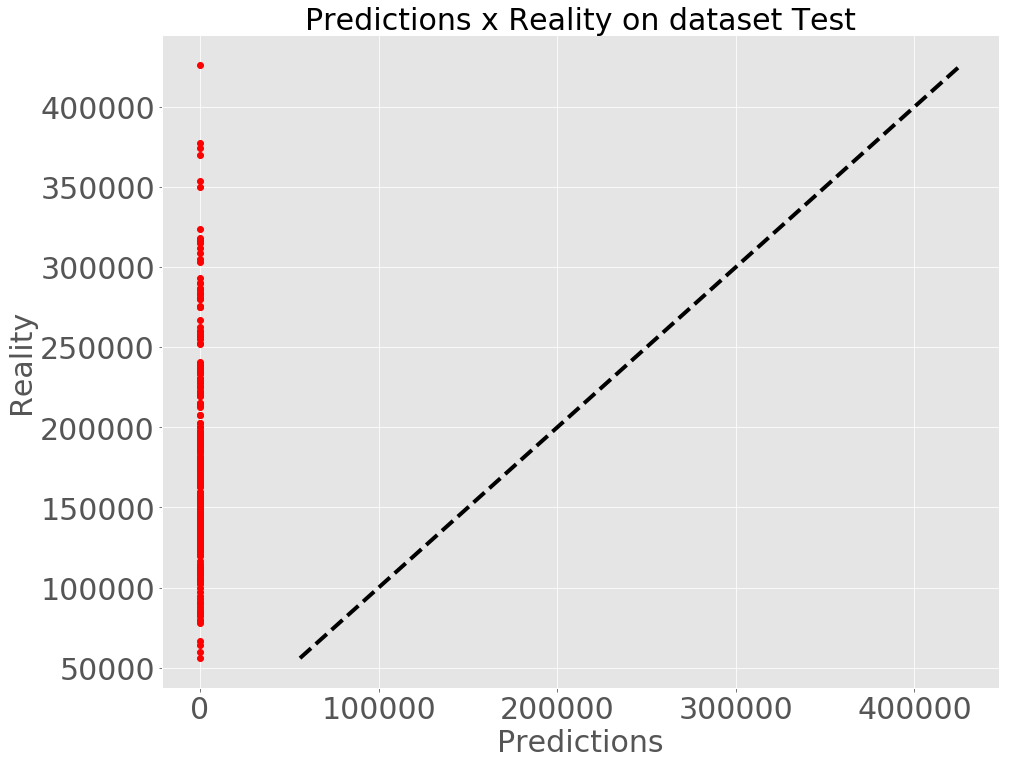

In [27]:
#visualize the results!
#This block of code will import our data visualization tool, 
#calculate the predicted values, grab the actual values, and then plot them against each other.

import matplotlib.pyplot as plt
import matplotlib
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training = True), steps=1)
loss_score = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score))
import matplotlib.pyplot as plt
import matplotlib
import itertools
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training = True), steps=1)
loss_score = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score))
reality = pd.DataFrame(prepro.inverse_transform(testing_set.select_dtypes(exclude=['object'])), columns = [COLUMNS]).SalePrice
y = regressor.predict(input_fn=lambda: input_fn_new(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))
predictions = pd.DataFrame(prepro_y.inverse_transform(np.array(predictions).reshape(263,1)))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
fig, ax = plt.subplots(figsize=(15, 12))
plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()